Pre-Download Data
===

To save you the hassle of repeated downloads, it's easier so save the files in a shared folder.

To run all cells, select **Cell** > **Run All**. You can also run cells one at a time, select **Cell** > **Run cells** in the menu above.

In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

# Some of these are hard to distinguish.
# Check https://quickdraw.withgoogle.com/data for examples
zoo = ['frog', 'horse', 'lion', 'monkey', 'octopus', 'owl', 'rhinoceros', 
       'snail', 'tiger', 'zebra']

# Mapping between category names and ids
animal2id = dict((c,i) for i,c in enumerate(zoo))
id2animal = dict((i,c) for i,c in enumerate(zoo))
for i, animal in id2animal.items():
    print("Class {}: {}".format(i, animal))

Class 0: frog
Class 1: horse
Class 2: lion
Class 3: monkey
Class 4: octopus
Class 5: owl
Class 6: rhinoceros
Class 7: snail
Class 8: tiger
Class 9: zebra


## zoo data download 太慢了再加上翻牆 maybe_download(url, DATA_DIR) 慢得受不了，改用 wget 有效，抓好了放在 yun.baidu.com '[Github repo tensorflow-workshop](https://yun.baidu.com/disk/home?#list/vmode=list&path=%2F%E7%99%BE%E5%BA%A6%E4%BA%91%E6%94%B6%E8%97%8F%2FMoocs%2FDataset)' folder 內。
    
    for animal in zoo:
        url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{}.npy".format(animal)
        print(url + " --> " + DATA_DIR)

    '''
    
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/horse.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/lion.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/monkey.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/octopus.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/owl.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/rhinoceros.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snail.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/tiger.npy --> data/
    https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/zebra.npy --> data/

    --- 1.bat ---
        :frog
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy
        dir frog.npy
        if errorlevel 1 goto frog
        :horse
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/horse.npy
        dir horse.npy
        if errorlevel 1 goto horse
        :lion
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/lion.npy
        dir lion.npy
        if errorlevel 1 goto lion
        :monkey
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/monkey.npy
        dir monkey.npy
        if errorlevel 1 goto monkey
        :octopus
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/octopus.npy
        dir octopus.npy
        if errorlevel 1 goto octopus
        :owl
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/owl.npy
        dir owl.npy
        if errorlevel 1 goto owl
        :rhinoceros
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/rhinoceros.npy
        dir rhinoceros.npy
        if errorlevel 1 goto rhinoceros
        :snail
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/snail.npy
        dir snail.npy
        if errorlevel 1 goto snail
        :tiger
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/tiger.npy
        dir tiger.npy
        if errorlevel 1 goto tiger
        :zebra
        wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/zebra.npy
        dir zebra.npy
        if errorlevel 1 goto zebra
    --- 1.bat ---
    '''   

In [18]:
from six.moves.urllib.request import urlretrieve
import os

DATA_DIR = 'data/'

def maybe_download(url, data_dir):
    filename = url.split('/')[-1]
    file_path = os.path.join(data_dir, filename)

    # Check if the file already exists.
    if not os.path.exists(file_path):
        if not os.path.exists(data_dir):
            os.makedirs(data_dir)

        print("Downloading {} to {}".format(url, file_path))
        file_path, _ = urlretrieve(url=url, filename=file_path)
    else:
        print("Using previously downloaded file: {}".format(file_path))
    return file_path

def load_data(file_path, max_examples=2000, example_name=''):
    d = np.load(open(file_path, 'rb'))  # was 'r' that's wrong hcchen5600-2018-3-6-18:47
    d = d[:max_examples,:] # limit number of instances to save memory
    print("Loaded {} {} examples of dimension {} from {}".format(
            d.shape[0], example_name, d.shape[1], file_path))
    return d

data= []
labels =[]

for animal in zoo:
    url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{}.npy".format(animal)
    file_path = maybe_download(url, DATA_DIR)
    data.append(load_data(file_path, max_examples = 1000, example_name = animal))
    labels.extend([animal2id[animal]]*data[-1].shape[0])

data = np.concatenate(data, axis=0)
labels = np.array(labels)
print("Final shape of data: {}".format(data.shape))

Using previously downloaded file: data/frog.npy
Loaded 1000 frog examples of dimension 784 from data/frog.npy
Using previously downloaded file: data/horse.npy
Loaded 1000 horse examples of dimension 784 from data/horse.npy
Using previously downloaded file: data/lion.npy
Loaded 1000 lion examples of dimension 784 from data/lion.npy
Using previously downloaded file: data/monkey.npy
Loaded 1000 monkey examples of dimension 784 from data/monkey.npy
Using previously downloaded file: data/octopus.npy
Loaded 1000 octopus examples of dimension 784 from data/octopus.npy
Using previously downloaded file: data/owl.npy
Loaded 1000 owl examples of dimension 784 from data/owl.npy
Using previously downloaded file: data/rhinoceros.npy
Loaded 1000 rhinoceros examples of dimension 784 from data/rhinoceros.npy
Using previously downloaded file: data/snail.npy
Loaded 1000 snail examples of dimension 784 from data/snail.npy
Using previously downloaded file: data/tiger.npy
Loaded 1000 tiger examples of dimen

The data is fun to look at. Compared to MNIST the classes seem much harder to distinguish

7922 7
Category 7: snail


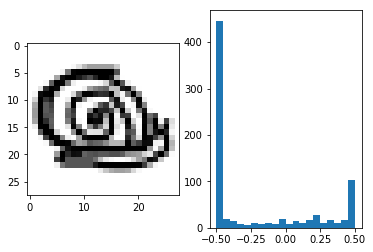

6144 6
Category 6: rhinoceros


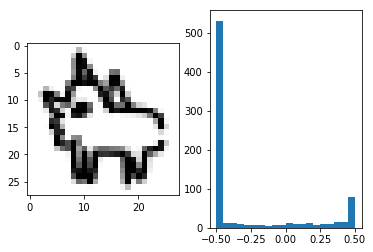

5842 5
Category 5: owl


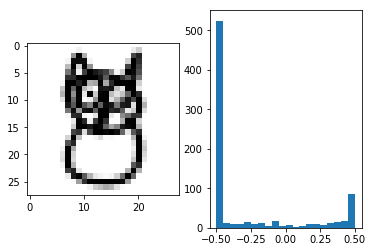

3386 3
Category 3: monkey


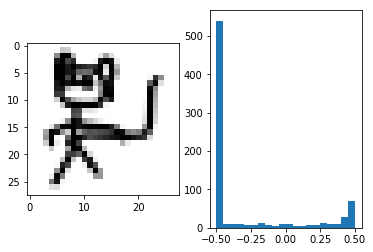

1758 1
Category 1: horse


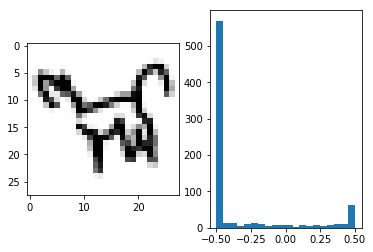

8965 8
Category 8: tiger


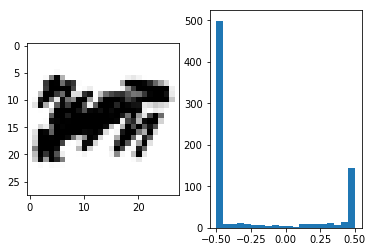

5201 5
Category 5: owl


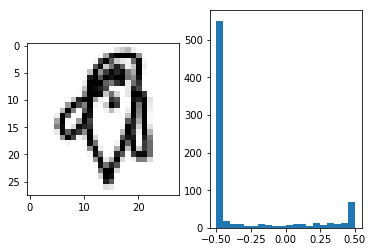

5383 5
Category 5: owl


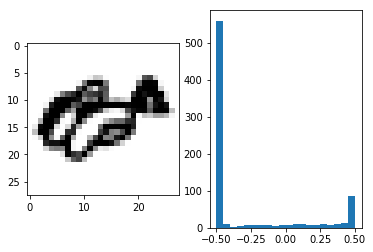

3472 3
Category 3: monkey


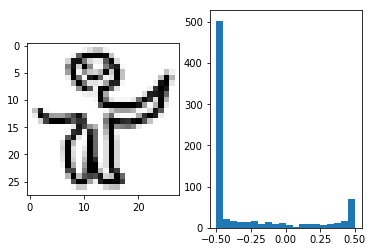

6616 6
Category 6: rhinoceros


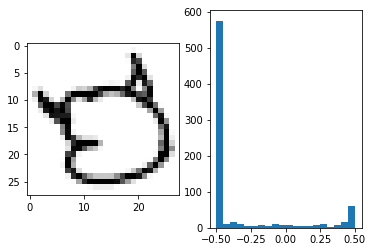

In [24]:
import matplotlib.pyplot as plt

n_samples = 10
random_indices = np.random.permutation(data.shape[0])

for i in random_indices[:n_samples]:
    print(i, labels[i])
    print("Category {}: {}".format(labels[i], id2animal[labels[i]]))

    # We'll show the image and its pixel value histogram side-by-side.

    # To interpret the values as a 28x28 image, we need to reshape
    # the numpy array, which is one dimensional.
    image = data[i, :]

    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image.reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    ax2.hist(image, bins=20)
    ax1.grid(False)
    plt.show()

In [20]:
if data.dtype == 'uint8':  # avoid doing this twice
    data = data.astype(np.float32)
    data = (data - (255 / 2.0)) / 255

Our labels are 0,1,2,..,10 right now. We convert to a one-hot representation

In [21]:
random_indices = np.random.permutation(labels.shape[0])

print("Labels before:")
print(labels[random_indices[:5]])

def one_hot(labels, n_classes):
    n_labels = len(labels)
    one_hot_labels = np.zeros((n_labels, n_classes))
    one_hot_labels[np.arange(n_labels), labels] = 1
    return one_hot_labels

labels_one_hot = one_hot(labels, len(zoo))

print("Labels after:")
print(labels_one_hot[random_indices[:5]])

Labels before:
[3 8 4 3 1]
Labels after:
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


Finally, let's split the data into random train and test partitions

In [22]:
n_test_examples = 1000

random_indices = np.random.permutation(data.shape[0])
test_data = data[random_indices[:n_test_examples],:]
test_labels = labels_one_hot[random_indices[:n_test_examples],:]
train_data = data[random_indices[n_test_examples:],:]
train_labels = labels_one_hot[random_indices[n_test_examples:],:]
print("Data shapes: ", test_data.shape, test_labels.shape, train_data.shape, train_labels.shape)

Data shapes:  (1000, 784) (1000, 10) (9000, 784) (9000, 10)


Save data for other experiments

In [23]:
outfile_name = os.path.join(DATA_DIR, "zoo.npz")
with open(outfile_name, 'wb') as outfile:  # was 'b' must be 'wb' -- hcchen5600 2018-3-7 
    np.savez(outfile, train_data, train_labels, test_data, test_labels)
print ("Saved train/test data to {}".format(outfile_name))

Saved train/test data to data/zoo.npz
